In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
import os
import shutil
import random

# Define paths
dataset_path = "./minet"  # Original dataset
train_path = "./train"
val_path = "./val"

# Create train and validation directories
os.makedirs(train_path, exist_ok=True)
os.makedirs(val_path, exist_ok=True)

for class_name in os.listdir(dataset_path):  # Loop through each mineral class
    class_path = os.path.join(dataset_path, class_name)

    if os.path.isdir(class_path):  # Ensure it's a directory
        images = os.listdir(class_path)
        random.shuffle(images)  # Shuffle to get a random split

        split_idx = int(0.8 * len(images))  # 80% for training
        train_images = images[:split_idx]
        val_images = images[split_idx:]

        # Create class subfolders in train and val directories
        os.makedirs(os.path.join(train_path, class_name), exist_ok=True)
        os.makedirs(os.path.join(val_path, class_name), exist_ok=True)

        # Move images
        for img in train_images:
            shutil.move(os.path.join(class_path, img), os.path.join(train_path, class_name, img))

        for img in val_images:
            shutil.move(os.path.join(class_path, img), os.path.join(val_path, class_name, img))

print("Dataset successfully split into training and validation sets!")


Dataset successfully split into training and validation sets!


In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Paths to training and validation datasets
dataset_train = "./train"
dataset_val = "./val"

# Data augmentation & normalization
datagen = ImageDataGenerator(rescale=1./255)

train_data = datagen.flow_from_directory(
    dataset_train,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

val_data = datagen.flow_from_directory(
    dataset_val,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

# Get the number of classes
num_classes = len(train_data.class_indices)
print(f"Number of classes: {num_classes}")


Found 763 images belonging to 7 classes.
Found 194 images belonging to 7 classes.
Number of classes: 7


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def build_model():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
        MaxPooling2D(2,2),

        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2,2),

        Conv2D(128, (3,3), activation='relu'),
        MaxPooling2D(2,2),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.3),  # Regularization
        Dense(num_classes, activation='softmax')  # Output layer
    ])

    return model


In [8]:
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

optimizers = {
    "SGD": SGD(learning_rate=0.01, momentum=0.9),
    "Adam": Adam(learning_rate=0.001),
    "RMSprop": RMSprop(learning_rate=0.0005)
}

history_results = {}  # Store results for comparison

for opt_name, opt in optimizers.items():
    print(f"\nTraining with {opt_name} optimizer...\n")

    model = build_model()
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(train_data, epochs=10, validation_data=val_data, verbose=1)

    history_results[opt_name] = history  # Save history for later analysis



Training with SGD optimizer...



C:\Users\parik\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\parik\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.2259 - loss: 1.8900 - val_accuracy: 0.4794 - val_loss: 1.5748
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 14s 587ms/step - accuracy: 0.3970 - loss: 1.5099 - val_accuracy: 0.3866 - val_loss: 1.4777
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 464ms/step - accuracy: 0.4659 - loss: 1.3666 - val_accuracy: 0.4691 - val_loss: 1.3157
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 19s 803ms/step - accuracy: 0.5818 - loss: 1.1437 - val_accuracy: 0.5722 - val_loss: 1.1147
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 422ms/step - accuracy: 0.5600 - loss: 1.1232 - val_accuracy: 0.6959 - val_loss: 0.9416
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 437ms/step - accuracy: 0.6198 - loss: 1.0988 - val_accuracy: 0.5206 - val_loss: 1.1083
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 440ms/step - accuracy: 0.6109 - loss: 1.0658 - val_accuracy: 0.7010 - val_loss: 0.8269
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 439ms/step - accuracy: 0.6515 - loss: 0.9351 - val_accurac

In [14]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)


In [16]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

def evaluate_model(model, data, opt_name):
    predictions = model.predict(data)
    y_pred = np.argmax(predictions, axis=1)
    y_true = np.array(data.classes)  # Convert true labels to NumPy

    # Classification Report
    print(f"\n🔹 Performance Metrics for {opt_name} Optimizer:")
    report = classification_report(y_true, y_pred, target_names=list(data.class_indices.keys()))
    print(report)

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    print(f"\n🔹 Confusion Matrix for {opt_name}:\n", cm)

    return report, cm

# Evaluate all models
evaluation_results = {}
for opt_name, history in history_results.items():
    evaluation_results[opt_name] = evaluate_model(model, val_data, opt_name)


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 390ms/step

🔹 Performance Metrics for SGD Optimizer:
              precision    recall  f1-score   support

     biotite       0.00      0.00      0.00        14
     bornite       0.10      0.03      0.05        34
 chrysocolla       0.28      0.27      0.28        33
   malachite       0.00      0.00      0.00        48
   muscovite       0.09      0.25      0.13        16
      pyrite       0.00      0.00      0.00        20
      quartz       0.18      0.66      0.28        29

    accuracy                           0.17       194
   macro avg       0.09      0.17      0.10       194
weighted avg       0.10      0.17      0.11       194


🔹 Confusion Matrix for SGD:
 [[ 0  0  1  0  3  0 10]
 [ 0  1  4  0 14  0 15]
 [ 0  0  9  0  8  0 16]
 [ 0  5 10  0 11  0 22]
 [ 0  0  3  0  4  0  9]
 [ 0  1  2  0  3  0 14]
 [ 0  3  3  0  4  0 19]]


C:\Users\parik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\parik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\parik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 321ms/step

🔹 Performance Metrics for Adam Optimizer:
              precision    recall  f1-score   support

     biotite       0.00      0.00      0.00        14
     bornite       0.10      0.03      0.05        34
 chrysocolla       0.22      0.21      0.22        33
   malachite       0.00      0.00      0.00        48
   muscovite       0.09      0.25      0.13        16
      pyrite       0.00      0.00      0.00        20
      quartz       0.15      0.55      0.24        29

    accuracy                           0.14       194
   macro avg       0.08      0.15      0.09       194
weighted avg       0.08      0.14      0.09       194


🔹 Confusion Matrix for Adam:
 [[ 0  0  3  0  4  0  7]
 [ 0  1  4  0 10  0 19]
 [ 0  0  7  0 12  0 14]
 [ 0  1 11  0  9  0 27]
 [ 0  2  1  0  4  0  9]
 [ 0  2  2  0  3  0 13]
 [ 0  4  4  0  5  0 16]]


C:\Users\parik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\parik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\parik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 276ms/step

🔹 Performance Metrics for RMSprop Optimizer:
              precision    recall  f1-score   support

     biotite       0.00      0.00      0.00        14
     bornite       0.20      0.06      0.09        34
 chrysocolla       0.09      0.09      0.09        33
   malachite       0.00      0.00      0.00        48
   muscovite       0.15      0.44      0.22        16
      pyrite       0.00      0.00      0.00        20
      quartz       0.12      0.45      0.19        29

    accuracy                           0.13       194
   macro avg       0.08      0.15      0.09       194
weighted avg       0.08      0.13      0.08       194


🔹 Confusion Matrix for RMSprop:
 [[ 0  0  5  0  5  0  4]
 [ 0  2  6  0  6  0 20]
 [ 0  2  3  0  9  0 19]
 [ 0  3  5  0  9  0 31]
 [ 0  0  3  0  7  0  6]
 [ 0  1  3  0  4  0 12]
 [ 0  2  7  0  7  0 13]]


C:\Users\parik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\parik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\parik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

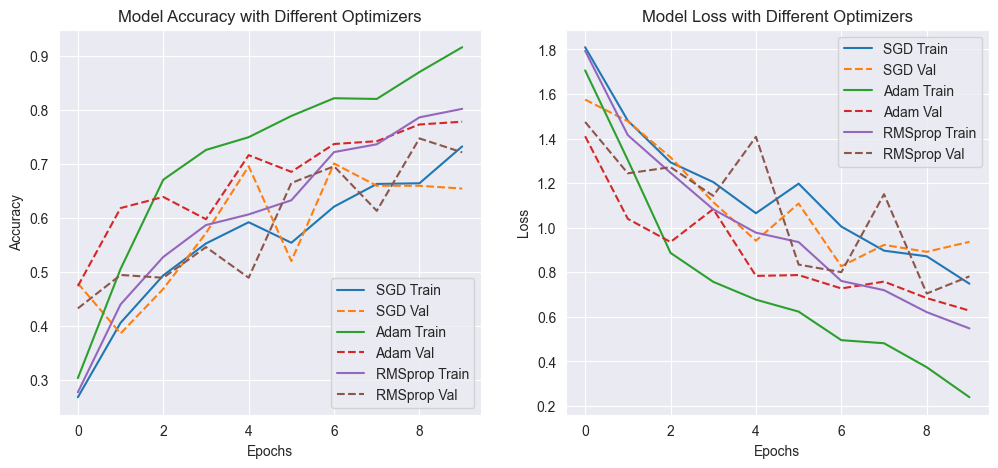

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
for opt_name, history in history_results.items():
    plt.plot(history.history['accuracy'], label=f'{opt_name} Train')
    plt.plot(history.history['val_accuracy'], linestyle='dashed', label=f'{opt_name} Val')

plt.title("Model Accuracy with Different Optimizers")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
for opt_name, history in history_results.items():
    plt.plot(history.history['loss'], label=f'{opt_name} Train')
    plt.plot(history.history['val_loss'], linestyle='dashed', label=f'{opt_name} Val')

plt.title("Model Loss with Different Optimizers")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()
